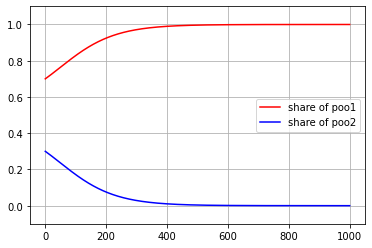

In [4]:
# simulate

import matplotlib.pyplot as plt
import math
%matplotlib inline

# paras
h1 = 2; h2 = 1; x12 = 0.5; x21=0.3 ;ta=20 ;r=6 ;T=600 ;p=0.1
x1 = [0.7]
x2 = [1 - x1[0]]
dt = 0.001
# fitnesses
F1 = [(((h1*(x1[0]-x12))/((h1*(x1[0]-x12))+(h2*(x2[0]-x21))))*(r*(math.exp(-(ta/T))))-(p*h1*(x1[0]-x12))) * dt]
F2 = [(((h2*(x2[0]-x21))/((h1*(x1[0]-x12))+(h2*(x2[0]-x21))))*(r*(math.exp(-(ta/T))))-(p*h2*(x2[0]-x21))) * dt]
F = [(x1[0] * F1[0] + x2[0] * F2[0]) * dt]

for t in range(1000):
    # fitnesses
    f1 = ((((h1*(x1[t]-x12))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-(ta/T))))-(p*h1*(x1[t]-x12))) 
    f2 = ((((h2*(x2[t]-x21))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-(ta/T))))-(p*h2*(x2[t]-x21)))
    ff = x1[t] * f1 + x2[t] * f2
    F1.append(f1*dt)
    F2.append(f2*dt)
    F.append(ff*dt)
    # differential equations for shares
    x1.append(x1[t] + ((x1[t]*(1-x1[t])*(f1-f2)) * dt))
    x2.append(x2[t] + ((x2[t]*(1-x2[t])*(f2-f1)) * dt))
    #x1.append(x1[t] + ((x1[t]*(f1-ff)) * dt))
    #x2.append(x2[t] + ((x2[t]*(f2-ff)) * dt))

plt.plot(x1, 'r', label = 'share of poo1')
plt.plot(x2, 'b', label = 'share of poo2')
#plt.plot(F1, 'r--', label ='fitness of cooperators')
#plt.plot(F2, 'b--', label ='fitness of defectors')
#plt.plot(F, 'g--', label ='mean population fitness')
plt.legend(loc = 'best')
plt.ylim(-0.1, 1.1)
plt.grid()


In [2]:
# use sympy to calculate steady states
from sympy import *
import math
# paras
h1 = 2; h2 = 1; x12 = 0.5; x21=0.3 ;ta=20 ;r=6 ;T=600 ;p=0.1
dt = 0.001
x1, x2 = symbols('x1, x2')
f1 = (((h1*(x1-x12))/((h1*(x1-x12))+(h2*(x2-x21))))*(r*(math.exp(-(ta/T))))-(p*h1*(x1-x12))) 
f2 = (((h2*(x2-x21))/((h1*(x1-x12))+(h2*(x2-x21))))*(r*(math.exp(-(ta/T))))-(p*h2*(x2-x21))) 
f = (x1 * f1 + x2 * f2) 

d1 = x1 * (f1-f)
d2 = x2 * (f2-f)

# use sympy's way of setting equations to zero
Equal1 = Eq(d1, 0)
Equal2 = Eq(d2, 0)
print(Equal1)
# compute fixed points
equilibria = solve([Equal1, Equal2], [x1, x2])
print(equilibria)

Eq(x1*(-x1*(-0.2*x1 + 5.80329660289204*(2*x1 - 1.0)/(2*x1 + x2 - 1.3) + 0.1) - 0.2*x1 - x2*(-0.1*x2 + 5.80329660289204*(x2 - 0.3)/(2*x1 + x2 - 1.3) + 0.03) + 5.80329660289204*(2*x1 - 1.0)/(2*x1 + x2 - 1.3) + 0.1), 0)
[(0.0, 0.0), (0.0, 0.300000000000000), (0.0, 1.00000000000000), (0.0, 59.3329660289204), (0.500000000000000, 0.0), (0.566666666666667, 0.433333333333333), (1.00000000000000, 0.0), (19.9776553429735 - 13.5951013847178*I, 19.3776553429735 + 27.1902027694355*I), (19.9776553429735 + 13.5951013847178*I, 19.3776553429735 - 27.1902027694355*I), (29.6664830144602 - 0.5*x2, x2)]


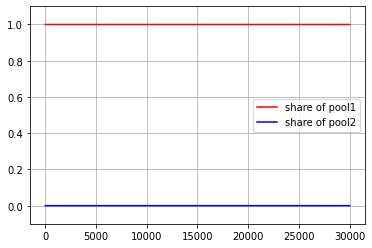

In [6]:
# simulate with steady state
import matplotlib.pyplot as plt
%matplotlib inline

# paras
h1 = 2; h2 = 1; x12 = 0.5; x21=0.3 ;ta=20 ;r=6 ;T=600 ;p=0.1
# deviate slightly from the fixed point value 
x1 = [1 - 0.00001]
x2 = [1 - x1[0]]
dt = 0.001

for t in range(30000):
    # fitnesses
    f1 = ((((h1*(x1[t]-x12))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-(ta/T))))-(p*h1*(x1[t]-x12))) 
    f2 = ((((h2*(x2[t]-x21))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-(ta/T))))-(p*h2*(x2[t]-x21)))
    ff = x1[t] * f1 + x2[t] * f2
    # differential equations for shares
    x1.append(x1[t] + ((x1[t]*(1-x1[t])*(f1-f2)) * dt))
    x2.append(x2[t] + ((x2[t]*(1-x2[t])*(f2-f1)) * dt))

plt.plot(x1, 'r', label = 'share of pool1')
plt.plot(x2, 'b', label = 'share of pool2')
plt.legend(loc = 'best')
plt.ylim(-0.1, 1.1)
plt.grid()

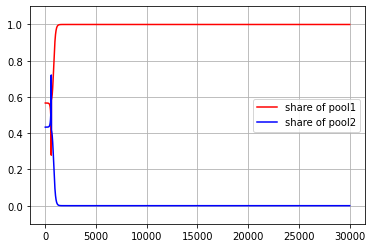

In [7]:
# simulate with steady state
import matplotlib.pyplot as plt
%matplotlib inline

# paras
h1 = 2; h2 = 1; x12 = 0.5; x21=0.3 ;ta=20 ;r=6 ;T=600 ;p=0.1
# deviate slightly from the fixed point value 
x1 = [0.566666666666667 - 0.00001]
x2 = [1 - x1[0]]
dt = 0.001

for t in range(30000):
    # fitnesses
    f1 = ((((h1*(x1[t]-x12))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-(ta/T))))-(p*h1*(x1[t]-x12))) 
    f2 = ((((h2*(x2[t]-x21))/((h1*(x1[t]-x12))+(h2*(x2[t]-x21))))*(r)*(math.exp(-(ta/T))))-(p*h2*(x2[t]-x21)))
    ff = x1[t] * f1 + x2[t] * f2
    # differential equations for shares
    x1.append(x1[t] + ((x1[t]*(1-x1[t])*(f1-f2)) * dt))
    x2.append(x2[t] + ((x2[t]*(1-x2[t])*(f2-f1)) * dt))

plt.plot(x1, 'r', label = 'share of pool1')
plt.plot(x2, 'b', label = 'share of pool2')
plt.legend(loc = 'best')
plt.ylim(-0.1, 1.1)
plt.grid()